#  Prime time to secure a hotel room

**LOADING THE DATASET**

In [ ]:
# Load the dataset
import pandas as pd
import numpy as np
df = pd.read_csv('/content/Hotel Bookings Ediglobe.csv')

# Display the first few rows of the dataset
print(df.head())


          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

# **IMPORTING THE DATASET**
# About the ideal length of stay for the best rates

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Statics Intrigued by the factors that might lead to a surge in special


In [ ]:

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (or alternatively, fill missing values)
df.dropna(inplace=True)

# Check the data types of columns
print(df.dtypes)

# Print the available columns in the dataframe
print(df.columns)

# Convert date columns to datetime if necessary
# Replace 'arrival_date_day_of_month' with the actual column name for arrival date
df['arrival_date_day_of_month'] = pd.to_datetime(df['arrival_date_day_of_month'], format='%d')

# Summary statistics
print(df.describe())


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# CORELATION MATRIX

# How does the length of stay correlate with daily rates



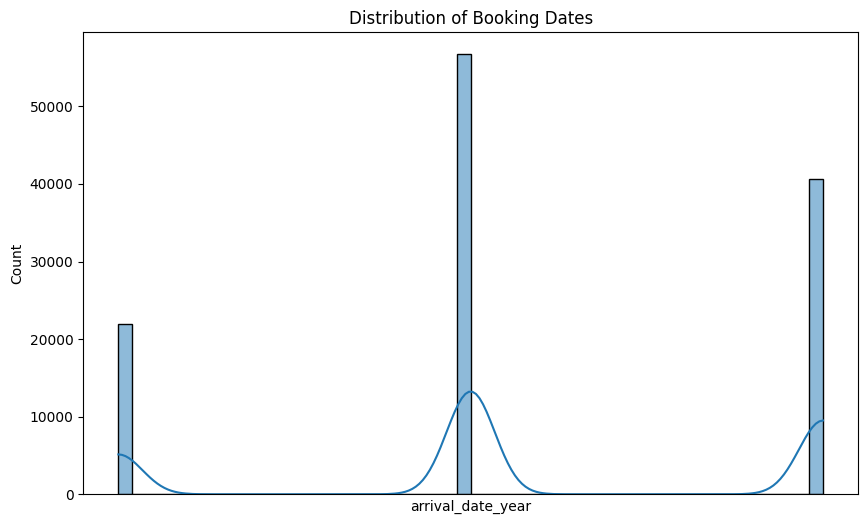

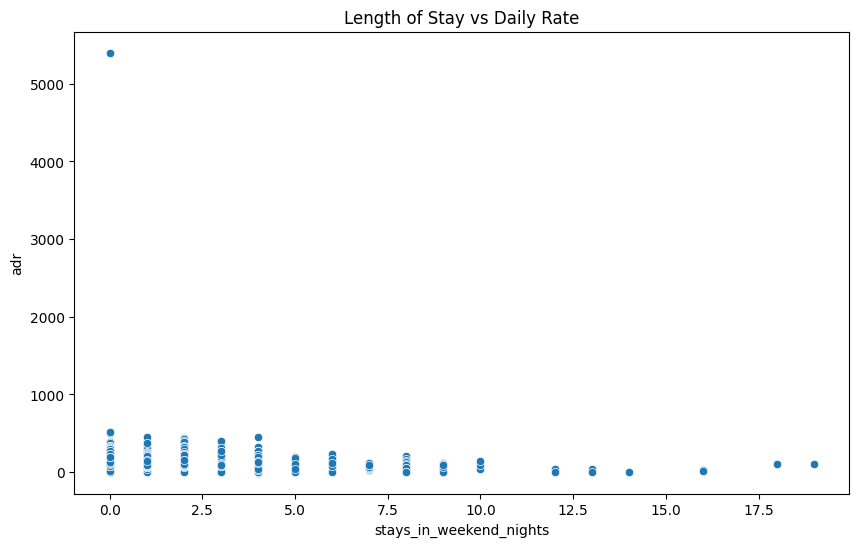

ValueError: could not convert string to float: 'Resort Hotel'

<Figure size 1000x800 with 0 Axes>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Hotel Bookings Ediglobe.csv')

# Check if the expected columns are present in the dataset
# Use actual column names from your dataset instead of 'datetime', 'length_of_stay', 'daily_rate'
required_columns = ['arrival_date_year', 'stays_in_weekend_nights', 'adr']  # Example column names
for col in required_columns:
    if col not in df.columns:
        print(f"Error: Column '{col}' not found in the dataset.")
        raise ValueError(f"Column '{col}' is missing.")

# Convert 'arrival_date_year' to datetime if it's not already
# (adjust column name if needed)
if not pd.api.types.is_datetime64_any_dtype(df['arrival_date_year']):
    df['arrival_date_year'] = pd.to_datetime(df['arrival_date_year'], errors='coerce')

# Drop rows with NaN values in important columns
df.dropna(subset=required_columns, inplace=True)

# Plot distribution of booking dates (adjust column name if needed)
plt.figure(figsize=(10, 6))
sns.histplot(df['arrival_date_year'], kde=True)
plt.title('Distribution of Booking Dates')
plt.show()

# Relationship between length of stay and daily rate (adjust column names if needed)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stays_in_weekend_nights', y='adr', data=df) # Example column names
plt.title('Length of Stay vs Daily Rate')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()








# ACTUAL VS PREDICTED GRAPH


# What demographic factors influence booking patterns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')
Mean Squared Error: 11339.388247471097
R^2 Score: 0.006796229552766597


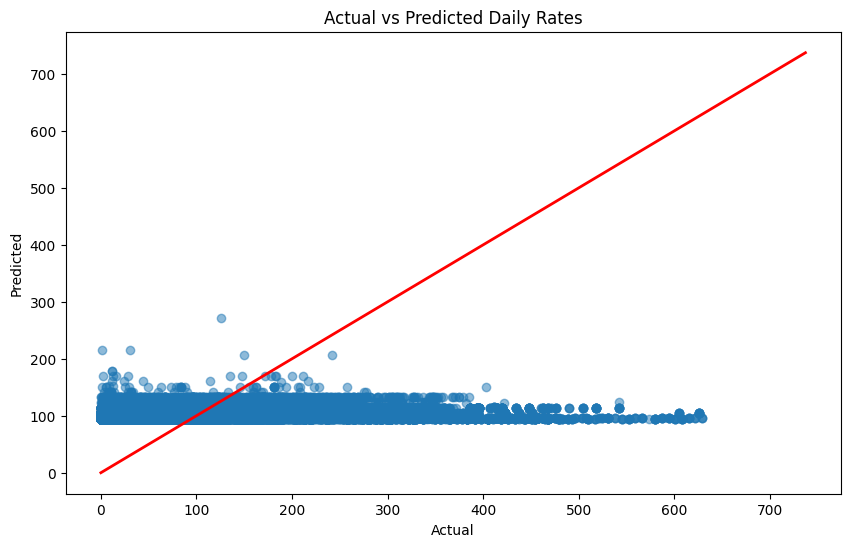

In [ ]:

# Print the available columns to verify their names
print(df.columns)

# Define features (X) and target (y)
X = df[['arrival_date_day_of_month', 'stays_in_weekend_nights']]  # Example features
y = df['lead_time']  # Example target

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split # Import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
from sklearn.linear_model import LinearRegression # Import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score  # Import necessary functions

mse = mean_squared_error(y_test, y_pred) # Removed extra space here
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# ... (rest of the code remains unchanged)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Daily Rates')
plt.show()


#Available Bookings

In [ ]:
# Function to display available bookings
def view_bookings(data):
    print("Available Bookings:")
    print(data[['hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'adults', 'children', 'babies', 'reserved_room_type', 'reservation_status']].head())

In [ ]:
# Function to filter bookings based on criteria
def filter_bookings(data, year=None, month=None, room_type=None):
    filtered_data = data
    if year:
        filtered_data = filtered_data[filtered_data['arrival_date_year'] == year]
    if month:
        filtered_data = filtered_data[filtered_data['arrival_date_month'] == month]
    if room_type:
        filtered_data = filtered_data[filtered_data['reserved_room_type'] == room_type]
    return filtered_data[['hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'adults', 'children', 'babies', 'reserved_room_type', 'reservation_status']]

#New bookings

In [ ]:
# Function to add a new booking
def add_booking(data, booking_details):
    new_booking = pd.DataFrame([booking_details], columns=data.columns)
    updated_data = pd.concat([data, new_booking], ignore_index=True)
    return updated_data

#Cancel Bookings

In [ ]:
# Function to cancel a booking
def cancel_booking(data, booking_id):
    data.loc[booking_id, 'is_canceled'] = 1
    data.loc[booking_id, 'reservation_status'] = 'Canceled'
    return data

#Hotel First few Bookings

In [ ]:
# # Display the first few bookings
# view_bookings(hotel_data)

import pandas as pd # Import pandas for data manipulation

# Assuming the hotel data is in a CSV file named 'hotel_bookings.csv'
hotel_data = pd.read_csv('/content/Hotel Bookings Ediglobe.csv')

# Display the first few bookings
view_bookings(hotel_data)

Available Bookings:
          hotel  arrival_date_year arrival_date_month  \
0  Resort Hotel               2015               July   
1  Resort Hotel               2015               July   
2  Resort Hotel               2015               July   
3  Resort Hotel               2015               July   
4  Resort Hotel               2015               July   

   arrival_date_day_of_month  adults  children  babies reserved_room_type  \
0                          1       2       0.0       0                  C   
1                          1       2       0.0       0                  C   
2                          1       1       0.0       0                  A   
3                          1       1       0.0       0                  A   
4                          1       2       0.0       0                  A   

  reservation_status  
0          Check-Out  
1          Check-Out  
2          Check-Out  
3          Check-Out  
4          Check-Out  


#Bookings of July 2015

In [ ]:
# Example: Filter bookings for July 2015
filtered_bookings = filter_bookings(hotel_data, year=2015, month='July')
print("\nFiltered Bookings (July 2015):")
print(filtered_bookings.head())



Filtered Bookings (July 2015):
          hotel  arrival_date_year arrival_date_month  \
0  Resort Hotel               2015               July   
1  Resort Hotel               2015               July   
2  Resort Hotel               2015               July   
3  Resort Hotel               2015               July   
4  Resort Hotel               2015               July   

   arrival_date_day_of_month  adults  children  babies reserved_room_type  \
0                          1       2       0.0       0                  C   
1                          1       2       0.0       0                  C   
2                          1       1       0.0       0                  A   
3                          1       1       0.0       0                  A   
4                          1       2       0.0       0                  A   

  reservation_status  
0          Check-Out  
1          Check-Out  
2          Check-Out  
3          Check-Out  
4          Check-Out  


In [ ]:
# Example: Add a new booking
new_booking = {
    'hotel': 'City Hotel', 'is_canceled': 0, 'lead_time': 15, 'arrival_date_year': 2024,
    'arrival_date_month': 'September', 'arrival_date_week_number': 36,
    'arrival_date_day_of_month': 5, 'stays_in_weekend_nights': 2, 'stays_in_week_nights': 3,
    'adults': 2, 'children': 0, 'babies': 0, 'meal': 'BB', 'country': 'USA',
    'market_segment': 'Online TA', 'distribution_channel': 'TA/TO',
    'is_repeated_guest': 0, 'previous_cancellations': 0,
    'previous_bookings_not_canceled': 0, 'reserved_room_type': 'A',
    'assigned_room_type': 'A', 'booking_changes': 0, 'deposit_type': 'No Deposit',
    'agent': None, 'company': None, 'days_in_waiting_list': 0, 'customer_type': 'Transient',
    'adr': 150.0, 'required_car_parking_spaces': 1, 'total_of_special_requests': 2,
    'reservation_status': 'Check-Out', 'reservation_status_date': '2024-09-10'
}

#Hotel data

In [ ]:
hotel_data = add_booking(hotel_data, new_booking)
print("\nBookings after adding a new one:")
view_bookings(hotel_data)


Bookings after adding a new one:
Available Bookings:
          hotel  arrival_date_year arrival_date_month  \
0  Resort Hotel               2015               July   
1  Resort Hotel               2015               July   
2  Resort Hotel               2015               July   
3  Resort Hotel               2015               July   
4  Resort Hotel               2015               July   

   arrival_date_day_of_month  adults  children  babies reserved_room_type  \
0                          1       2       0.0       0                  C   
1                          1       2       0.0       0                  C   
2                          1       1       0.0       0                  A   
3                          1       1       0.0       0                  A   
4                          1       2       0.0       0                  A   

  reservation_status  
0          Check-Out  
1          Check-Out  
2          Check-Out  
3          Check-Out  
4          Check-Out  


<ipython-input-4-a6cedae9bc9a>:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  updated_data = pd.concat([data, new_booking], ignore_index=True)


#Cancel bookings

In [ ]:
# Example: Cancel a booking (e.g., the first booking in the list)
hotel_data = cancel_booking(hotel_data, booking_id=0)
print("\nBookings after canceling the first booking:")
view_bookings(hotel_data)


Bookings after canceling the first booking:
Available Bookings:
          hotel  arrival_date_year arrival_date_month  \
0  Resort Hotel               2015               July   
1  Resort Hotel               2015               July   
2  Resort Hotel               2015               July   
3  Resort Hotel               2015               July   
4  Resort Hotel               2015               July   

   arrival_date_day_of_month  adults  children  babies reserved_room_type  \
0                          1       2       0.0       0                  C   
1                          1       2       0.0       0                  C   
2                          1       1       0.0       0                  A   
3                          1       1       0.0       0                  A   
4                          1       2       0.0       0                  A   

  reservation_status  
0           Canceled  
1          Check-Out  
2          Check-Out  
3          Check-Out  
4          Che

#Average Rate of hotel room

In [ ]:
# 1. Calculate Average Daily Rate (ADR)
def calculate_adr(data, year=None, month=None):
    filtered_data = filter_bookings(data, year, month)
    adr = filtered_data['adr'].mean()
    return adr

#Availability of Rooms

In [ ]:
# 2. Check Room Availability
def check_room_availability(data, year, month, day, room_type):
    filtered_data = data[(data['arrival_date_year'] == year) &
                         (data['arrival_date_month'] == month) &
                         (data['arrival_date_day_of_month'] == day) &
                         (data['reserved_room_type'] == room_type) &
                         (data['reservation_status'] != 'Canceled')]
    return len(filtered_data) == 0  # True if no booking found for that room type on the given date

#Statistics

In [ ]:
# 3. Summarize Booking Statistics
def booking_statistics(data):
    total_bookings = len(data)
    cancellations = data['is_canceled'].sum()
    avg_lead_time = data['lead_time'].mean()
    most_popular_room = data['reserved_room_type'].mode()[0]

    print(f"Total Bookings: {total_bookings}")
    print(f"Cancellations: {cancellations}")
    print(f"Average Lead Time: {avg_lead_time:.2f} days")
    print(f"Most Popular Room Type: {most_popular_room}")

In [ ]:
# 4. Find the Most Popular Room Type
def most_popular_room_type(data):
    popular_room = data['reserved_room_type'].mode()[0]
    count = data[data['reserved_room_type'] == popular_room].shape[0]
    return popular_room, count

In [ ]:
# Example usages
view_bookings(hotel_data)

Available Bookings:
          hotel  arrival_date_year arrival_date_month  \
0  Resort Hotel               2015               July   
1  Resort Hotel               2015               July   
2  Resort Hotel               2015               July   
3  Resort Hotel               2015               July   
4  Resort Hotel               2015               July   

   arrival_date_day_of_month  adults  children  babies reserved_room_type  \
0                          1       2       0.0       0                  C   
1                          1       2       0.0       0                  C   
2                          1       1       0.0       0                  A   
3                          1       1       0.0       0                  A   
4                          1       2       0.0       0                  A   

  reservation_status  
0           Canceled  
1          Check-Out  
2          Check-Out  
3          Check-Out  
4          Check-Out  


#July Room Availaibility

In [ ]:
# Check room availability for room type 'A' on 1st July 2015
is_available = check_room_availability(hotel_data, year=2015, month='July', day=1, room_type='A')
print(f"\nRoom type 'A' availability on 1st July 2015: {'Available' if is_available else 'Not Available'}")



Room type 'A' availability on 1st July 2015: Not Available


In [ ]:
# Display booking statistics
print("\nBooking Statistics:")
booking_statistics(hotel_data)


Booking Statistics:
Total Bookings: 119391
Cancellations: 44225
Average Lead Time: 104.01 days
Most Popular Room Type: A


#A IS MOST POPULAR ROOM

In [ ]:
 #Find the most popular room type
popular_room, count = most_popular_room_type(hotel_data)
print(f"\nMost Popular Room Type: {popular_room} with {count} bookings")


Most Popular Room Type: A with 85995 bookings
